In [283]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


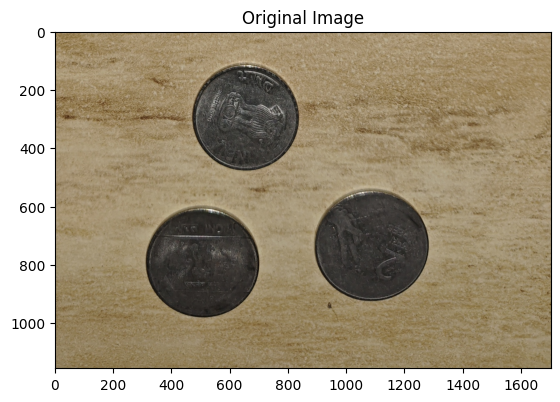

In [ ]:
image = cv2.imread("coins_indians.jpg", cv2.IMREAD_COLOR) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image,cmap=None)
plt.title("Original Image")
plt.show()
# Use the image path for image


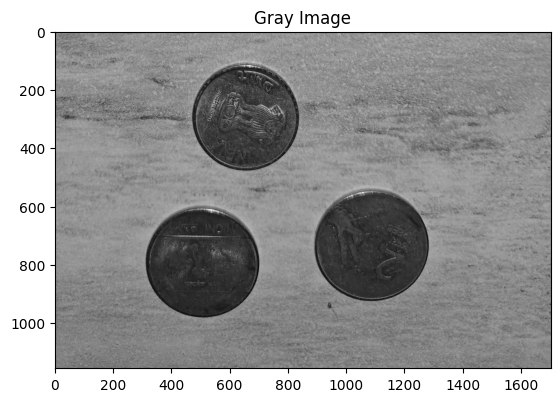

In [587]:
image_copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.title("Gray Image")
plt.show()

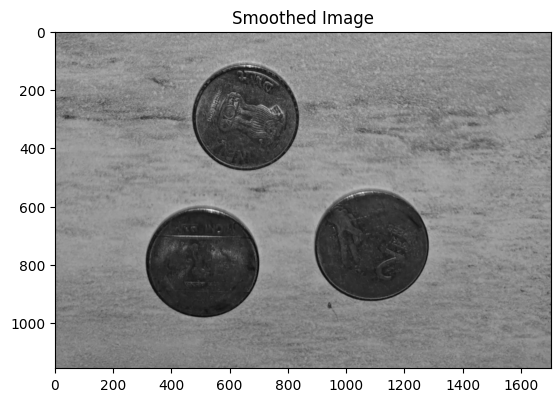

In [ ]:
image_blurr = cv2.GaussianBlur(gray,(5,5),1)
plt.imshow(image_blurr,cmap='gray')
plt.title("Smoothed Image")
plt.show()
# gaussian smoothing

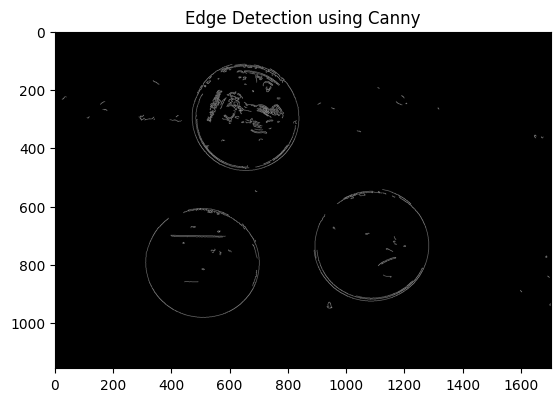

In [ ]:
edges = cv2.Canny(image_blurr, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection using Canny")
plt.show()
#using canny detector get edges


## DYNAMIC THRESHOLDING as the REGION-BASED SEGMENTATION APPROACH and used Contours on it

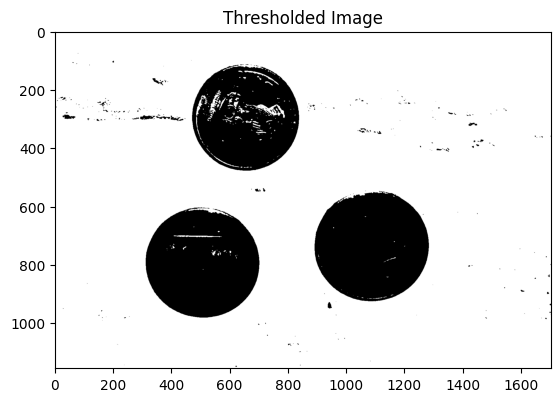

In [ ]:
_, thresh = cv2.threshold(image_blurr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh,cmap='gray')
plt.title("Thresholded Image")
plt.show()
# here hardcoding the threshold will give for only certain types of images but I need to handle all forms of images

In [631]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


In [ ]:
contour_area={}
for i in range(len(contours)):
    cnt= contours[i]
    ar = cv2.contourArea(cnt)
    contour_area[i]=ar
print(contour_area)
#I am printing and checking the contour's area

{0: 1966888.5, 1: 21.0, 2: 7.0, 3: 2.0, 4: 2.0, 5: 2.0, 6: 14.0, 7: 4.0, 8: 10.0, 9: 2.0, 10: 2.0, 11: 39.0, 12: 19.5, 13: 4.0, 14: 7.0, 15: 8.5, 16: 4.0, 17: 12.5, 18: 4.0, 19: 17.0, 20: 11.5, 21: 2.0, 22: 2.0, 23: 24.0, 24: 4.0, 25: 16.5, 26: 21.0, 27: 7.0, 28: 2.0, 29: 4.0, 30: 2.0, 31: 11.0, 32: 5.5, 33: 4.0, 34: 4.0, 35: 21.0, 36: 5.5, 37: 15.0, 38: 2.0, 39: 5.5, 40: 235.5, 41: 2.0, 42: 5.5, 43: 48.5, 44: 64.5, 45: 12.5, 46: 2.0, 47: 4.0, 48: 19.0, 49: 42.0, 50: 5.5, 51: 8.5, 52: 29.0, 53: 9.0, 54: 14.0, 55: 5.5, 56: 5.5, 57: 7.0, 58: 8.5, 59: 4.0, 60: 8.0, 61: 22.0, 62: 32.0, 63: 115435.0, 64: 0.0, 65: 3.0, 66: 3.5, 67: 0.5, 68: 1.5, 69: 22.5, 70: 12.5, 71: 0.5, 72: 3.5, 73: 26.5, 74: 86.5, 75: 0.0, 76: 12.5, 77: 5.5, 78: 1.0, 79: 0.0, 80: 2.0, 81: 0.0, 82: 32.5, 83: 1.0, 84: 27.0, 85: 1.0, 86: 4.0, 87: 447.0, 88: 14.5, 89: 1.5, 90: 1.5, 91: 5.0, 92: 3.0, 93: 2.0, 94: 12.0, 95: 2.0, 96: 4.0, 97: 4.0, 98: 116705.0, 99: 2.0, 100: 0.0, 101: 20.0, 102: 4.0, 103: 2.5, 104: 3.0, 105: 0

In [635]:
results = np.array(sorted(contour_area.items(), key=lambda x: -x[1]), dtype=int)
print(results)
# sorting the area under contours

[[      0 1966888]
 [     98  116705]
 [     63  115435]
 [    300  105039]
 [    402    1530]
 [    439     613]
 [    187     530]
 [    436     522]
 [    195     448]
 [     87     447]
 [    463     438]
 [    295     319]
 [    182     293]
 [    184     283]
 [     40     235]
 [    162     216]
 [    418     179]
 [    308     172]
 [    393     139]
 [    431     125]
 [    264     124]
 [    356     111]
 [    444     110]
 [    125     107]
 [    179      98]
 [    158      95]
 [    153      95]
 [    136      94]
 [    161      92]
 [    357      92]
 [     74      86]
 [    425      86]
 [    423      85]
 [    322      83]
 [    146      80]
 [    173      78]
 [    201      77]
 [    332      76]
 [    453      76]
 [    218      70]
 [    343      70]
 [    447      70]
 [    127      69]
 [     44      64]
 [    286      62]
 [    141      56]
 [    405      55]
 [    172      51]
 [    340      51]
 [    429      50]
 [    133      49]
 [     43      48]
 [    266   

In [634]:
segments_no = np.count_nonzero(results[:, 1] > 10000)
print(segments_no-1)
#I discovered for most cases the contour's area above 10,000 gives the correct result, the largest area is the entire image itself so ignoring it

3


In [629]:
for i in range(1,segments_no):
    image_copy=cv2.drawContours(image_copy, contours, results[i,0],(255,0,0),10)

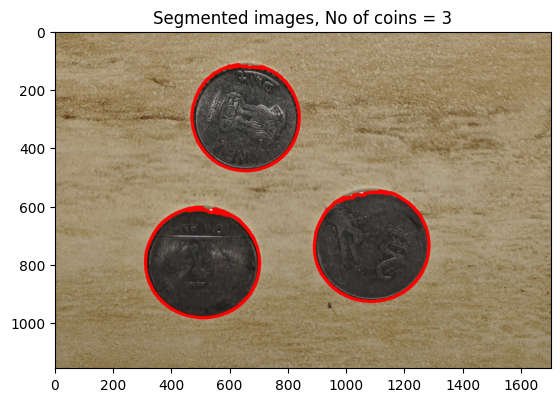

In [636]:
plt.imshow(image_copy)
plt.title(f"Segmented images, No of coins = {segments_no-1}")
plt.show()
#drawing contours around coins, and counting the number of coins